# Gaussain graphical models
This notebook contains outdated preliminary network analysis applied to ABCD data. We fit Gaussian graphical models to investigate the structural relationships between cognition, environment, demographics, and psychopathological dimensional scores (https://www.rdocumentation.org/packages/qgraph/versions/1.6.9/topics/EBICglasso for more info)

In [ ]:
library("devtools")
library("psychonetrics")
library("dplyr")
library("qgraph")
library("plyr")
library("psych")
install_github("sachaepskamp/psychonetrics")

In [ ]:
Vars1 <- c("enjoys_little", "bragadocious",
          "cant_concentrate", "obsessions",  "low_energy", "sad",
          "loud", "whines", "hyperactive", "withdrawn", "worries", "clings_to_adults",
          "bullys_others",  "demands_attention", "bad_diet", "no_guilt",
          "easily_jealous", "perfectionst", "fights", "teased", "impulsive", 
          "lying", "nervous_general", "paranoid", "anxious", "nervous_twiching",
          "not_liked", "overweight",  "doesnt_talk",
          "compulsions",  "shy", "sleeps_little", "sleeps_alot",
           "strange_ideas", "sulks",  "teases", "argues",
          "mood_flucuations", "lonley",
          "disobidient_friends", "body_aches", "easily_distracted")

Vars2 <- c("adhd_D", "aggressive_D",
          "somatic_problems_D", "social_problems_D",  "thought_disorder_D", "rule_breaking_D",
          "depress_D", "anxdisord_D", "ocd_D")

In [ ]:
require(plyr)
Data <- read.csv('../derived/task_demo_outcomes_panel.csv')
Data <- Data %>% mutate_each_(list(~scale(.) %>% as.vector), vars = Vars1)
Data$date <- mapvalues(Data$time, 
          from=c("0","1","2", "3"), 
          to=c("01012017 00:00", "01012018 00:00", "01012019 00:00","01012020 00:00"))
Data$Day <- as.Date(Data$date, tz = "Europe/Amsterdam", format="%m/%d/%Y %H:%M" )

In [ ]:
# Model, using FIML for missing data:
mod <- gvar(Data, vars = Vars1, dayvar = "Day", beta = "full", 
            omega_zeta = "full", estimator = "FIML")

In [ ]:
# Run and stepup:
mod <- mod %>% runmodel %>% prune %>% stepup(criterion = "none")

In [ ]:
temporal <- t(getmatrix(mod, "beta"))
contemporaneous <- getmatrix(mod, "omega_zeta")
Layout <- averageLayout(temporal, contemporaneous)

In [ ]:
mod

In [ ]:
qgraph(contemporaneous, labels = Vars1, theme = "colorblind",  width =100, height = 100,
       title = "Contemporaneous network",layout = Layout, minimum = 0.08, mar = c(2,2,2,2), details =TRUE, 
       vsize = 10)

In [ ]:
qgraph(temporal, labels = Vars1, theme = "colorblind", width =100, height = 100,
       title = "Temporal network", layout=Layout, minimum = 0.02, mar = c(3,3,3,3), details =TRUE,
       vsize = 10, asize = 5)

# Gaussian Graphical Models with EBIC tuning
Outdated, i.e. based on a previous version of the dataset.

Adapted from: https://www.nature.com/articles/s43586-021-00055-w

In [ ]:
Cognitive control: est_stroop, tb_flanker, tb_card
General intelligence: mr, tb_pictvocab, tb_list, tb_oral, lmt_efficiency, tb_pattern
Memory encoding: ravlt_sd, ravlt_ld, tb_pictseq
Motor impulse control: mid_payout, sst_ssrt
Temporal discounting: ddt_area
Emotional regulation: nb_regulation

In [402]:
DataAll = read.csv('/Users/clarewalker/Desktop/ABCD/derived/task_demo_outcomes_complete.csv')
dataAll <- select(DataAll, c('tb_flanker', 'tb_card', 'tb_pict.vocab', 'tb_list', 'tb_oral', 
                          'tb_pattern', 'tb_pict.seq', 'ravlt_sd', 'ravlt_ld', 'mr',
                         'sex', 'anthroweightcalc', 
                         'parent_conflict', 'father_alcohol', 'father_depression', 'mother_depression',
                         'demo_prnt_age_v2', 'demo_comb_income_v2', 'area_safe', 
                          'asr_scr_internal_t','asr_scr_external_t','asr_scr_depress_t','asr_scr_anxdisord_t', 
                          'asr_scr_adhd_r', 'asr_scr_antisocial_t','asr_scr_hyperactive_t'))
dt <- select(DataAll, c('asr_scr_internal_t','asr_scr_external_t','asr_scr_depress_t','asr_scr_anxdisord_t', 
                          'asr_scr_adhd_r', 'asr_scr_antisocial_t','asr_scr_hyperactive_t'),
             
                        c('tb_flanker', 'tb_card', 'tb_pattern', 'mr', 'ravlt_sd', 'mid_payout', 'ddt_area'),
             
                         c('sex', 'anthroweightcalc', 'child_white', 'relig_importance', 'area_safe',  'demo_comb_income_v2',
                          'demo_prnt_age_v2'),
             
                         c('parent_conflict', 'father_alcohol', 'father_depression', 'mother_depression',
                         'mother_alcohol', 'father_druguse', 'mother_druguse'))


#### define some useful variables ####



names <- c('Int', 'Ext', 'Dep', 'Anx', 'Adhd', 'Soc', 'Hyper',
        'Fla', 'Card', 'Pat', 'MR', 'Ravlt', 'MID', 'Disc',
           'Sex', 'Wt', 'White', 'God', 'Safe', 'Inco', 'PAge',
          'PCon', 'FAlc', 'FDep', 'MDep', 'MAlc', 'FDru', 'MDru')


In [405]:
names <- c('Int', 'Ext', 'Dep', 'Anx', 'Adhd', 'Soc', 'Hyper',
        'Fla', 'Card', 'Pat', 'MR', 'Ravlt', 'MID', 'Disc',
           'Sex', 'Wt', 'White', 'God', 'Safe', 'Inco', 'PAge',
          'PCon', 'FAlc', 'FDep', 'MDep', 'MAlc', 'FDru', 'MDru')

In [407]:
netdt3 <- dt
net3 <- EBICglasso(cor(netdt3), n = nrow(netdt3), threshold = FALSE)

Warning message in EBICglassoCore(S = S, n = n, gamma = gamma, penalize.diagonal = penalize.diagonal, :
“A dense regularized network was selected (lambda < 0.1 * lambda.max). Recent work indicates a possible drop in specificity. Interpret the presence of the smallest edges with care. Setting threshold = TRUE will enforce higher specificity, at the cost of sensitivity.”


In [430]:
clr <- c(rep(col1, 7),
         rep(col3, 7),
         rep(col4, 7),
         rep(col5, 7))

vsize <- c(rep(15, 7), rep(9, 21))

In [410]:
lbl <- names

In [412]:

maincircX <- sin(seq(0, 2 * pi, length = 4))[-4]/2.5
maincircY <- cos(seq(0, 2 * pi, length = 4))[-4]/2.5
smallcircX <- sin(seq(0, 2 * pi, length = 8))[-8]/3.8
smallcircY <- cos(seq(0, 2 * pi, length = 8))[-8]/3.8

layout = matrix(0, nrow = ncol(net3), ncol = 2)
layout[1:7, 1] = sin(seq(0, 2 * pi, length = 8))[-8]
layout[1:7, 2] = cos(seq(0, 2 * pi, length = 8))[-8]
layout[8:14, 1] = maincircX[1] + smallcircX
layout[8:14, 2] = maincircY[1] + smallcircY
layout[15:21, 1] = maincircX[2] + smallcircX
layout[15:21, 2] = maincircY[2] + smallcircY
layout[22:28, 1] = maincircX[3] + smallcircX
layout[22:28, 2] = maincircY[3] + smallcircY
layout <- layout * .9

In [431]:
# generate the initial qgraph plot
qg3 <- qgraph(net3, layout = layout, labels = lbl, color = clr,
              maximum = .4, vsize = vsize, cut = 0,
              fade = FALSE, DoNotPlot = TRUE,
              theme = "colorblind")

In [432]:
# fade colors within constructs
edg <- matrix(NA, nrow = nrow(net3), ncol = ncol(net3))
colnames(edg) <- rownames(edg) <- colnames(net3)
edg[upper.tri(edg)][net3[upper.tri(net3)] != 0] <- qg3$graphAttributes$Edges$color
edg[lower.tri(edg)] <- t(edg[upper.tri(edg)])

edg[,] <-  sapply(edg, Fade, bg = "white", alpha = .2)

In [433]:
# prepare plot for edges connecting traits and goals
net3b <- net3
net3b[1:7, 1:8] <- 0
net3b[8:nrow(net3b), 8:ncol(net3b)] <- 0

In [434]:
qg3 <- qgraph(net3,
              color = edg,
              labels = "", vsize = 0, layout = layout, 
              maximum = .4, edge.color = edg,
              fade = FALSE, DoNotPlot = TRUE,
              theme = "colorblind",
              title = "(c) Item-level",
              title.cex = 2,
              mar = mar,
              rescale = FALSE)

In [435]:
qg3a <- qgraph(net3b, 
               color = clr, 
               labels = lbl, vsize = vsize, layout = layout, 
               vsize = vsize, fade = FALSE, plot = FALSE,
               theme = "colorblind", DoNotPlot = TRUE,
               mar = mar, DoNotPlot = TRUE,
               rescale = FALSE, 
               label.cex = 0.8)

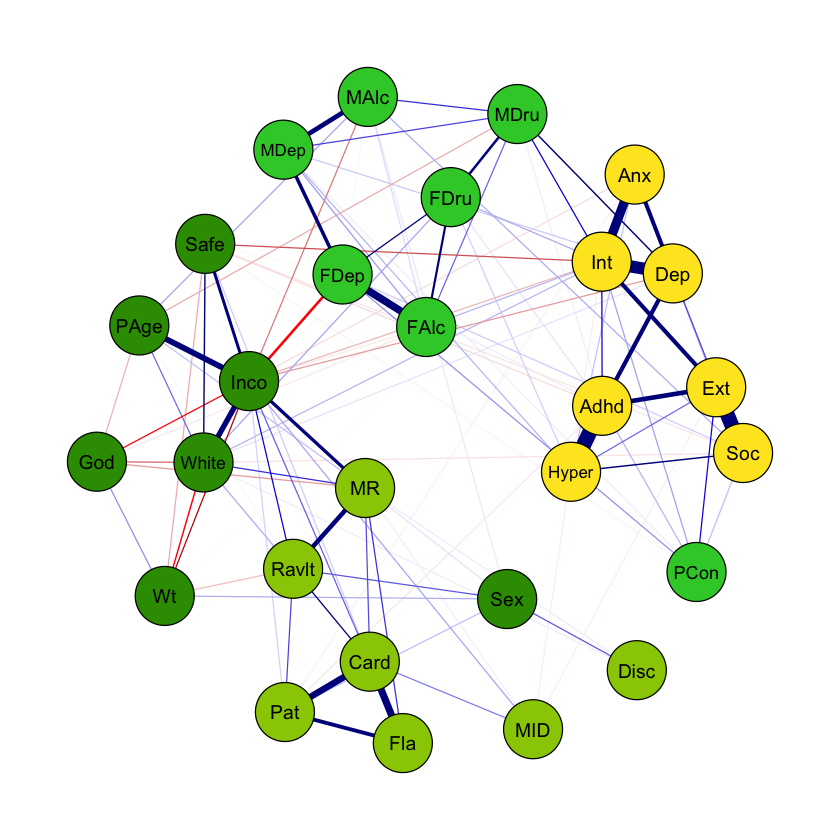

In [428]:
netdt3 <- dt
net3 <- EBICglasso(cor(netdt3), n = nrow(netdt3), threshold = FALSE)
clr <- c(rep(col1, 7),
         rep(col3, 7),
         rep(col4, 7),
         rep(col5, 7))
label <-names(dt)

qgraph(net3, layout = 'spring', labels = lbl, theme="colorblind", color=clr)

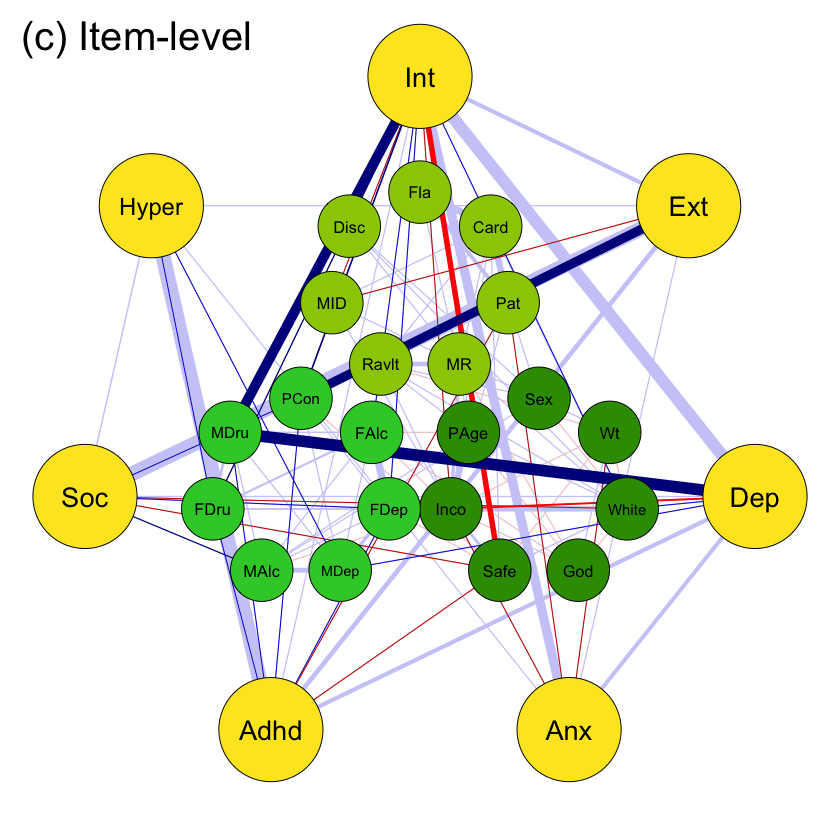

In [436]:
plot(qg3)
plot(qg3a)

In [ ]:
DataAll = read.csv('/Users/clarewalker/Desktop/ABCD/derived/task_demo_outcomes_complete.csv')
dataAll <- select(DataAll, c('tb_flanker', 'tb_card', 'tb_pict.vocab', 'tb_list', 'tb_oral', 
                          'tb_pattern', 'tb_pict.seq', 'ravlt_sd', 'ravlt_ld', 'mr',
                         'sex', 'anthroweightcalc', 
                         'parent_conflict', 'father_alcohol', 'father_depression', 'mother_depression',
                         'demo_prnt_age_v2', 'demo_comb_income_v2', 'area_safe', 
                          'asr_scr_internal_t','asr_scr_external_t','asr_scr_depress_t','asr_scr_anxdisord_t', 
                          'asr_scr_adhd_r', 'asr_scr_antisocial_t','asr_scr_hyperactive_t'))
# define a color palette for nodes to use often in code below
col1 <- "#FDE624" # outcomes
col2 <- "#218F8C" # trait
col3 <- "#99CC00" # facet intelligence (G)
col4 <- "#339900" # facet demographics (I)
col5 <- "#33CC33" # facet parents (F)
# plot margins for figures
mar <- c(1, 1, 1, 1)
#dt <- rename(dt, tb_pictvocab=tb_pict.vocab)
#dt <- rename(dt, tb_pictseq=tb_pict.seq)
dt$sex <- ifelse(dt$sex == 'M', 0, 1)
items <- names(dt)

In [437]:
netdt2 <- select(dt, c('tb_flanker', 'tb_card', 'tb_pattern', 'mr', 'ravlt_sd', 'mid_payout', 'ddt_area'),
             
                         c('sex', 'anthroweightcalc', 'child_white', 'relig_importance', 'area_safe',  'demo_comb_income_v2',
                          'demo_prnt_age_v2'),
             
                         c('parent_conflict', 'father_alcohol', 'father_depression', 'mother_depression',
                         'mother_alcohol', 'father_druguse', 'mother_druguse'),
            
             c('asr_scr_internal_t','asr_scr_external_t','asr_scr_depress_t','asr_scr_anxdisord_t', 
                          'asr_scr_adhd_r', 'asr_scr_antisocial_t','asr_scr_hyperactive_t'))
net2 <- EBICglasso(cor(netdt2), n = nrow(netdt2), threshold = FALSE)
names <- c('Fla', 'Card', 'Pat', 'MR', 'Ravlt', 'MID', 'Disc',
           'Sex', 'Wt', 'White', 'God', 'Safe', 'Inco', 'PAge',
          'PCon', 'FAlc', 'FDep', 'MDep', 'MAlc', 'FDru', 'MDru',
            'Int', 'Ext', 'Dep', 'Anx', 'Adhd', 'Soc', 'Hyper')

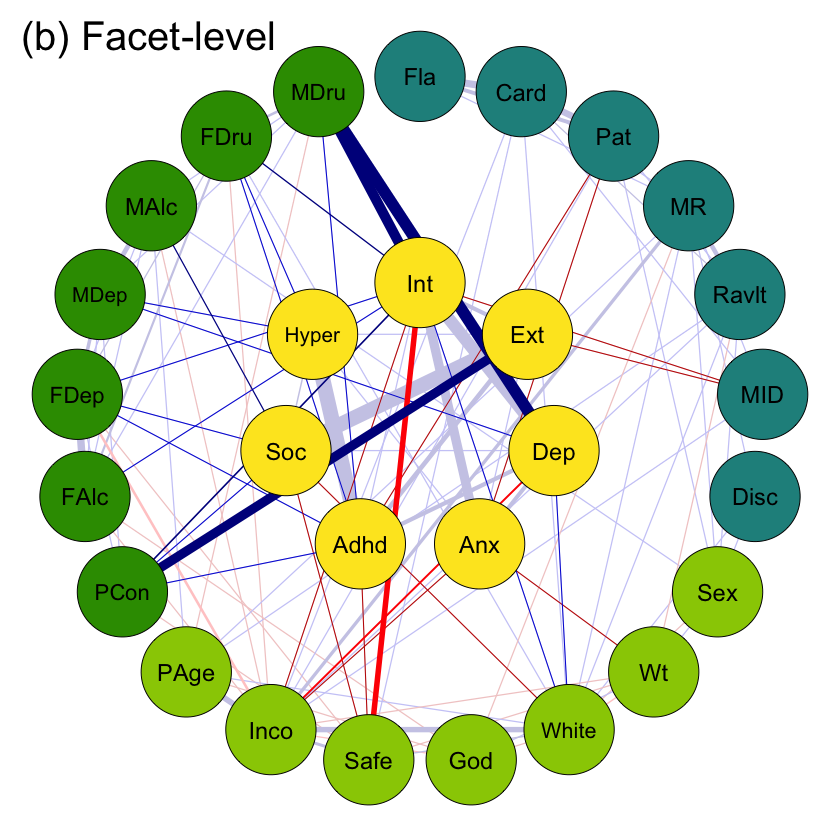

In [446]:
clr <- c(rep(col2, 7),
         rep(col3, 7),
         rep(col4, 7),
         rep(col1, 7))

lbl <- names

# define a convenient circular layout
maincircX <- sin(seq(0, 2 * pi, length = 8))[-8]/2.5
maincircY <- cos(seq(0, 2 * pi, length = 8))[-8]/2.5

layout <- matrix(0, nrow = ncol(net2), ncol = 2)
layout[1:21, 1] = sin(seq(0, 2 * pi, length = 22))[-22]
layout[1:21, 2] = cos(seq(0, 2 * pi, length = 22))[-22]
layout[22:28, 1] = maincircX
layout[22:28, 2] = maincircY
layout <- layout * .9

vsize <- c(rep(13, 21), rep(13, 7))

# generate the initial qgraph plot
qg2 <- qgraph(net2, color = clr, labels = lbl, layout = layout, maximum = .4,
              vsize = vsize, fade = FALSE, DoNotPlot = TRUE, theme = "colorblind")


# fade colors within constructs
edg <- matrix(NA, nrow = nrow(net2), ncol = ncol(net2))
colnames(edg) <- rownames(edg) <- colnames(net2)
edg[upper.tri(edg)][net2[upper.tri(net2)] != 0] <- qg2$graphAttributes$Edges$color
edg[lower.tri(edg)] <- t(edg[upper.tri(edg)])
edg[,] <-  sapply(edg, Fade, bg = "white", alpha = .2)


# prepare plot for within-constructs transparent edges
qg2 <- qgraph(net2,
              color = edg,
              labels = "", vsize = 0, layout = layout, 
              maximum = .4, edge.color = edg, 
              fade = FALSE, DoNotPlot = TRUE,
              theme = "colorblind",
              title = "(b) Facet-level",
              title.cex = 2,
              mar = mar,
              rescale = FALSE
)

# prepare plot for edges connecting traits and goals
net2b <- net2
net2b[1:21, 1:21] <- 0
net2b[22:nrow(net2b), 22:ncol(net2b)] <- 0

qg2a <- qgraph(net2b, layout = qg2$layout, labels = lbl, color = clr,
               vsize = vsize, fade = FALSE, theme = "colorblind",
               plot = FALSE,
               mar = mar, DoNotPlot = TRUE,
               rescale = FALSE, 
               label.cex = 0.8)

plot(qg2)
plot(qg2a)

Warning message in centralityPlot(net3, include = "Strength", standardized = FALSE):
“'standardized' argument is deprecated and will be removed.”
Note: z-scores are shown on x-axis rather than raw centrality indices.



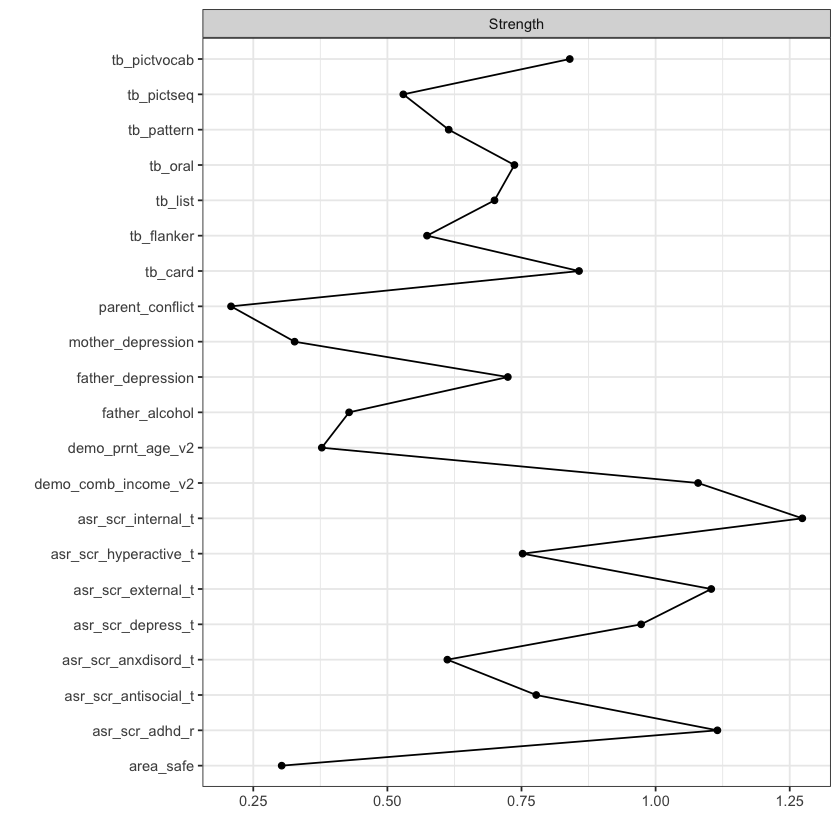

In [334]:
centralityPlot(net3, include = "Strength", standardized = FALSE)

In [ ]:
Fade <- function(col,alpha,bg)
{
  
  # col = color to fade
  # bg = color to fade to
  # alpha = inverse transparency, 1 = fully visible, 0 = fully transparent.
  
  if(is.na(col)) return(NA)
  
  if (missing(bg)) bg <- par("bg")
  if (length(bg)!=1) stop("'bg' must be of length 1")
  if (length(alpha)==1) alpha <- rep(alpha,length(col))
  if (length(col)==1) col <- rep(col,length(alpha))
  if (length(col)!=length(alpha)) stop("Length of 'col' not equal to length of 'alpha'")
  
  n <- length(col)
  
  rgbCols <- col2rgb(col)/255
  rgbBG <-  col2rgb(bg)/255
  
  colAlpha <- col2rgb(col,alpha=TRUE)[4,]/255
  
  Mix <- rgbCols*rep(alpha,each=3) + rgbBG%*%t(1-alpha)
  
  return(rgb(Mix[1,],Mix[2,],Mix[3,],colAlpha))
}